In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
path="diabetes.csv"
df=pd.read_csv(path)

In [3]:
df.head() # outcome 1 yes and outcome 0 means no

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

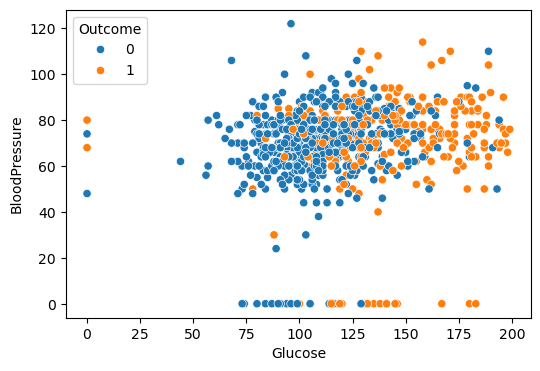

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Glucose',y="BloodPressure",hue='Outcome',data=df)

<Axes: xlabel='Outcome', ylabel='BMI'>

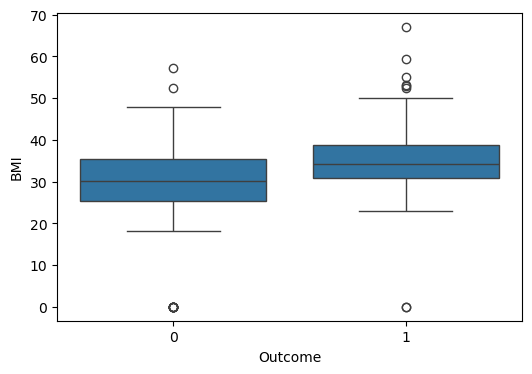

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome',y='BMI',data=df)

<Axes: >

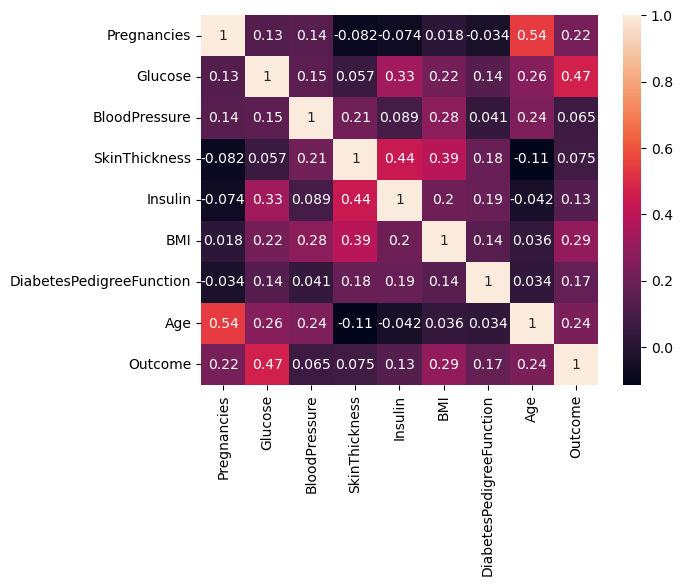

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

In [13]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [15]:
svm=SVC(probability=True,kernel='linear')
svm.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [16]:
y_pred=svm.predict(X_test)
y_pred_train=svm.predict(X_train)

In [17]:
print("Testing Accuracy :",accuracy_score(y_test,y_pred)*100)
print("Training Accuracy :",accuracy_score(y_train,y_pred_train)*100)

Testing Accuracy : 77.27272727272727
Training Accuracy : 78.66449511400651


In [18]:
print(classification_report(y_test,y_pred,target_names=['1','0']))

              precision    recall  f1-score   support

           1       0.78      0.91      0.84       100
           0       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



<Axes: >

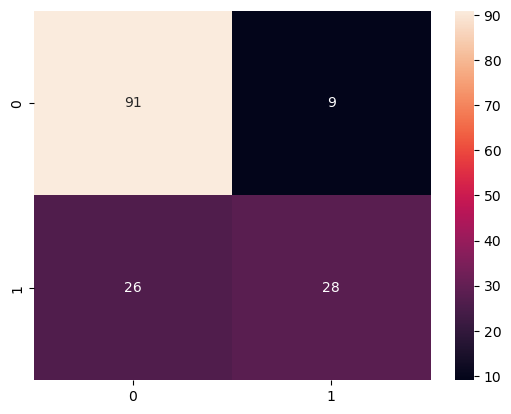

In [19]:
cm=confusion_matrix(y_test,y_pred)
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm,annot=True)

In [21]:
X = df.drop("Outcome", axis=1)
print(X.columns)



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


## **Random Forest**

In [21]:
clf=RandomForestClassifier(
    n_estimators=150,
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=10,
    max_features="sqrt",
    oob_score=True,
    random_state=42,
    n_jobs=-1)


In [22]:
clf_score=cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print("Random Forest CV Accuracy:", np.mean(clf_score))

Random Forest CV Accuracy: 0.766980731686614


In [23]:
clf.fit(X_train,y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,5
,min_samples_split,4
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [24]:
y_pred_clf=clf.predict(X_test)
y_pred_train_clf=clf.predict(X_train)

In [25]:
print("Testing Accuracy :",accuracy_score(y_test,y_pred_clf)*100)
print("Training Accuracy :",accuracy_score(y_train,y_pred_train_clf)*100)

Testing Accuracy : 75.97402597402598
Training Accuracy : 83.22475570032573


<Axes: >

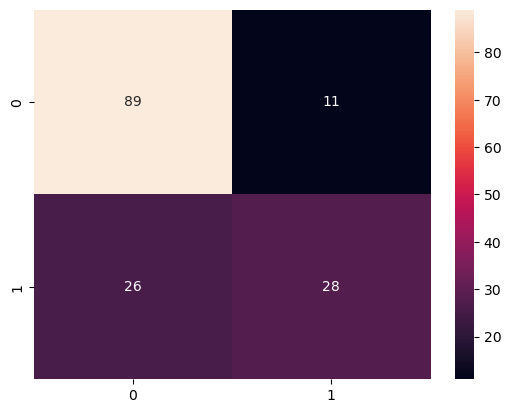

In [26]:
cm1=confusion_matrix(y_test,y_pred_clf)
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm1,annot=True)

In [27]:
import pickle

In [28]:
# Save SVM model
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm, f)

# Save Random Forest model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(clf, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)